Cluster Summary:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
1        43.892857           91.285714               16.678571
2        44.318182           25.772727               20.272727
3        56.400000           55.288889               48.355556
4        32.692308           86.538462               82.128205
5        26.560606           47.363636               56.787879


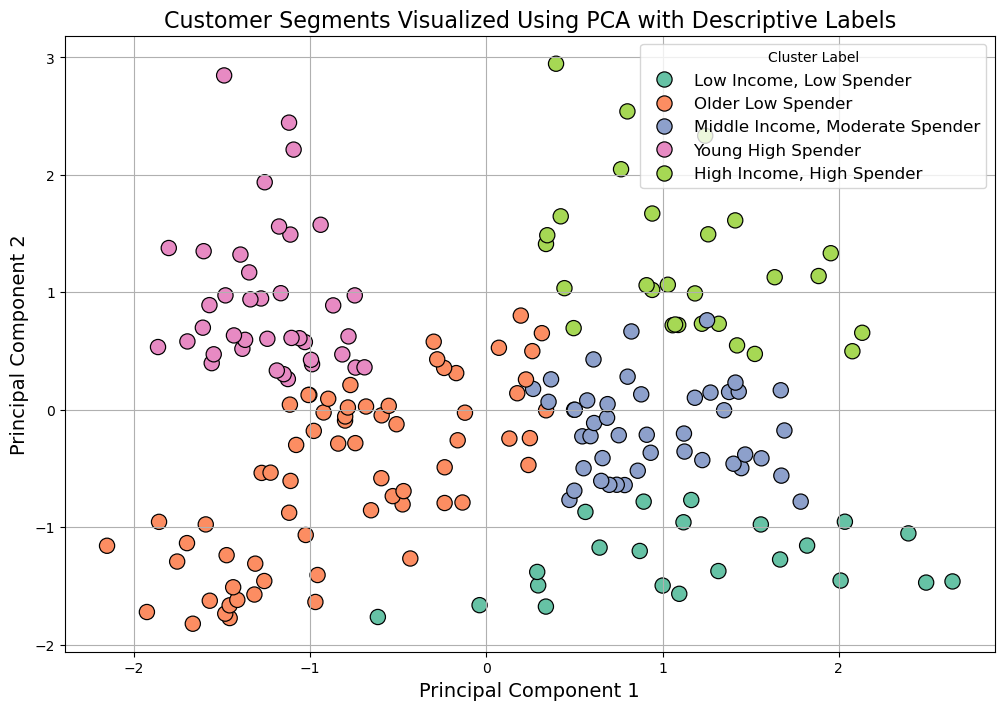

In [1]:
# Project :Mall Customer Segmentation Dataset	Use descriptive statistics and
# clustering techniques to group customers based on purchasing behavior.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster

# Step 1: Load the dataset
data = pd.read_csv("C:/Users/User/Desktop/Python/Ivoyant Projects/Mall Customers/Mall_Customers (1).csv", encoding='ISO-8859-1')

# Step 2: Fill missing values for numerical columns
numerical_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Step 3: Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Step 4: Perform hierarchical clustering using the 'ward' method
Z = linkage(data_scaled, method='ward')

# Step 5: Create flat clusters (choosing 5 clusters)
clusters = fcluster(Z, 5, criterion='maxclust')

# Step 6: Add cluster labels to the dataset
data['Cluster'] = clusters

# Step 7: Analyze cluster characteristics to assign descriptive labels
cluster_summary = data.groupby('Cluster')[numerical_columns].mean()
print("Cluster Summary:\n", cluster_summary)

# Map the clusters to meaningful labels based on characteristics
# Example: Modify these labels based on actual analysis
cluster_labels = {
    1: "High Income, High Spender",
    2: "Low Income, Low Spender",
    3: "Middle Income, Moderate Spender",
    4: "Young High Spender",
    5: "Older Low Spender"
}

# Add descriptive labels to the dataset
data['Cluster Label'] = data['Cluster'].map(cluster_labels)

# Step 8: Apply PCA to reduce dimensions for 2D visualization
pca = PCA(n_components=2)  # Reduce to 2D
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Step 9: Visualize the clusters using a scatter plot with custom colors and descriptive labels
plt.figure(figsize=(12, 8))
custom_palette = sns.color_palette("Set2", n_colors=len(cluster_labels))  # Set2 has distinctive colors
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster Label', data=data, 
                palette=custom_palette, s=120, marker='o', edgecolor='black')
plt.title('Customer Segments Visualized Using PCA with Descriptive Labels', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster Label', loc='best', fontsize=12)
plt.grid(True)
plt.show()
